# Pathfinding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import cv2

from robot_child.orb.utils import timer
from robot_child.orb import draw

## Load Map

here we load the map and process it to be binary.

We also create a dilated version to account for vehicle size.

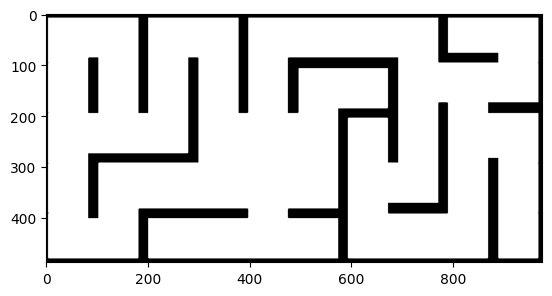

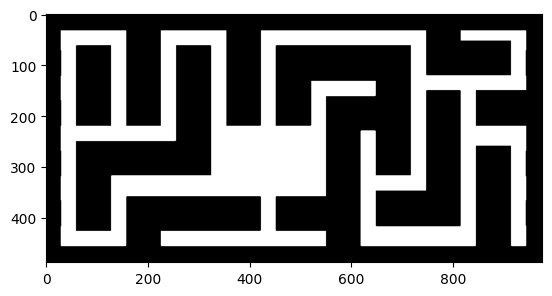

In [2]:
map = plt.imread("example_grid.png")
map = map[..., 0]
map[map>0.5] = 1
map[map<=0.5] = 0
map = 1-map.astype(np.uint8)
occ = cv2.dilate(map, np.ones((50, 50), dtype=np.uint8))

# map = np.zeros((5, 5), dtype=np.uint8)
# map[1, 1] = 1
# map[1, 2] = 1
# map[2, 1] = 1
# map[1, 3] = 1
# map[3, 3] = 1
# map[3, 1] = 1
# map[4, 1] = 1

plt.imshow(map, cmap='binary')
plt.show()
plt.imshow(occ, cmap='binary')
plt.show()

returning


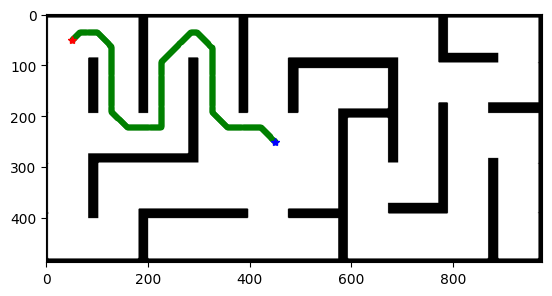

In [7]:
def Point(x, y):
    return (x, y)

# @njit
def adjacent_points(px, py, map):
    width, height = map.shape
    assert map[px, py] == 0
    
    options = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if not (dx == 0 and dy == 0):
                if px+dx >= 0 and px+dx<width and py+dy >= 0 and py+dy < height:
                    if map[px+dx, py+dy] == 0:
                        options.append((px+dx, py+dy))
    assert len(options) <= 8, f"too many options {len(options)} returned for {px=}, {py=}, {map.shape=}"
    assert len(options) >= 1, f"no options returned for {px=}, {py=}, {map.shape=}"
    return options
                
# @njit
def bfs(start, end, map: np.array):
    assert map[start[0], start[1]] == 0, f"Starting point {start} must be unoccupied"
    assert map[end[0], end[1]] == 0, f"Ending point {end} must be unoccupied"
    discovered = set()
    # [ (node, [path]), ... ]
    stack = [(start, [start])]    
    while stack:
        node, path = stack.pop(0)
        if not node in discovered:
            if node == end:
                print("returning")
                return path
            discovered.add(node)
            for neighbor in adjacent_points(node[0], node[1], map):
                stack.append((neighbor, path + [neighbor]))
    raise ValueError("no valid path found!")
    # return discovered
    # return path

start = Point(50, 50)
end = Point(450, 250)
path = bfs(start, end, occ.T)

plt.plot([p[0] for p in path], [p[1] for p in path], 'g.-')
plt.plot(start[0], start[1], 'r*')
plt.plot(end[0], end[1], 'b*')

plt.imshow(map, cmap='binary')
plt.show()

returning
BFS start=(50, 50), end=(50, 200) Time: 0.1281s
returning
BFS start=(50, 200), end=(50, 50) Time: 0.1663s
returning
BFS start=(50, 50), end=(150, 50) Time: 0.0675s
returning
BFS start=(50, 50), end=(450, 250) Time: 1.2882s
returning
BFS start=(820, 50), end=(700, 450) Time: 0.9521s
returning
BFS start=(820, 50), end=(880, 50) Time: 0.0117s
returning
BFS start=(50, 450), end=(880, 50) Time: 3.3257s


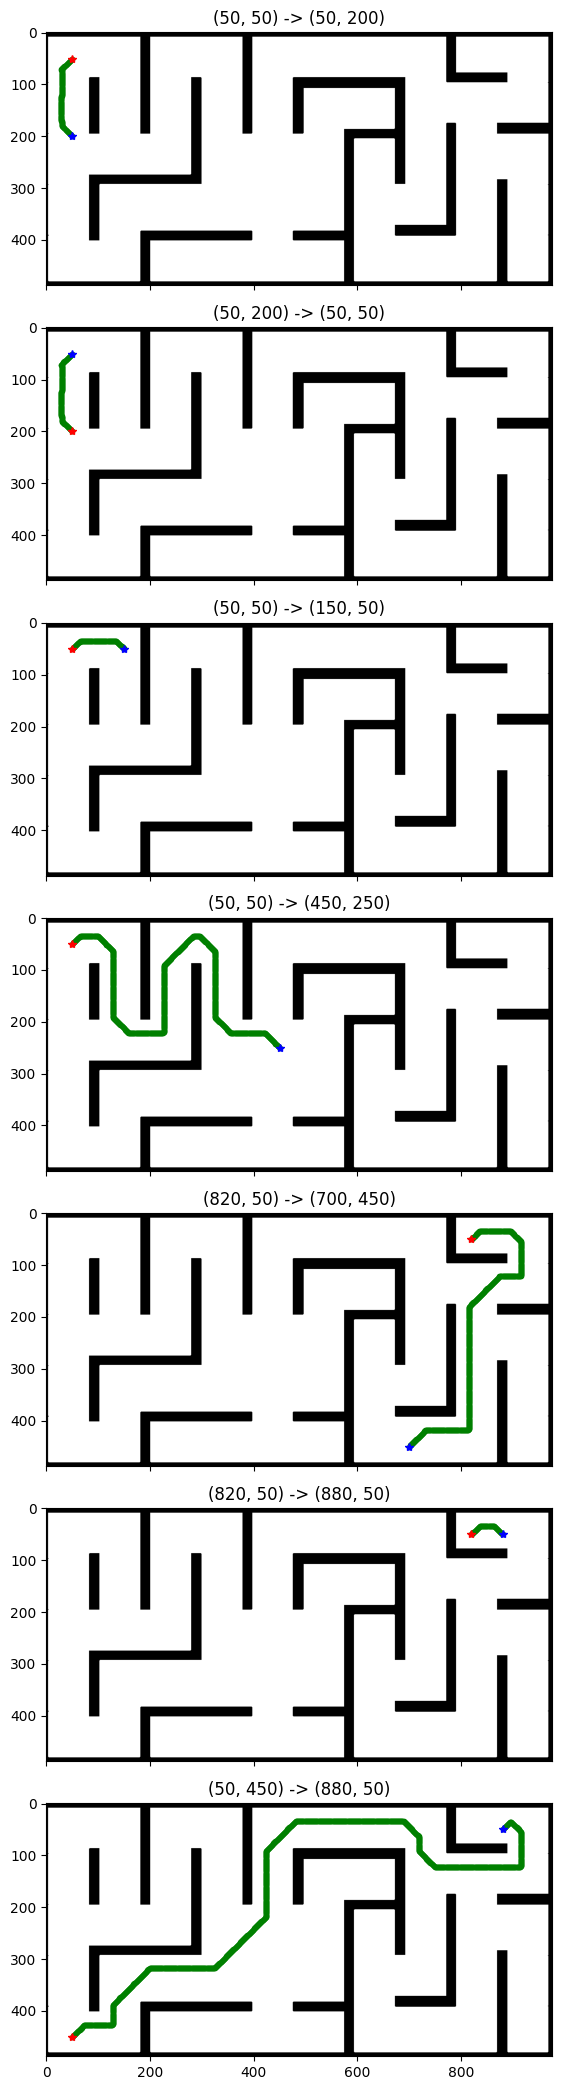

In [11]:
test_pairs = [
    (Point(50, 50), Point(50, 200)),
    (Point(50, 200), Point(50, 50)),
    (Point(50, 50), Point(150, 50)),
    # (Point(50, 50), Point(180, 100)),
    (Point(50, 50), Point(450, 250)),
    (Point(820, 50), Point(700, 450)),
    (Point(820, 50), Point(880, 50)),
    (Point(50, 450), Point(880, 50)),
]

nrows = len(test_pairs)
ncols = 1

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*3), sharex=True, sharey=True)

for ax, (start, end) in zip(axes, test_pairs):
    with timer(f"BFS {start=}, {end=}"):
        path = bfs(start, end, occ.T)

    ax.set_title(f"{start} -> {end}")
    ax.imshow(map, cmap='binary')
    ax.plot([p[0] for p in path], [p[1] for p in path], 'g.-')
    ax.plot(start[0], start[1], 'r*')
    ax.plot(end[0], end[1], 'b*')
    
plt.tight_layout()
plt.show()